# Import Libraries

In [76]:
import numpy as np
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
observatory = '/home/mfonseca/fastdisk'
my_computer = '/home/polaris/Lab_Astro/data/'

directory = my_computer

In [78]:
matched_no_mags_path = directory + 'cross_match/EMU_0102-32_DESY6GOLD_VIKING_CATWISE_noMags/EMU_0102-32_DESY6GOLD_VIKINGDR5_CATWISE_noMag.fits'
matched_no_mags = Table.read(matched_no_mags_path)
matched_no_mags = matched_no_mags.to_pandas()

matched_no_mags['EMU_island_name'] = matched_no_mags['EMU_island_name'].str.decode('utf-8').str.strip(' ')

match_mask = (matched_no_mags['match_flag'] == 1) & (matched_no_mags['p_i'] >= 0.1) & (matched_no_mags['p_any'] >=0.83)
catalog_matches_noMags = matched_no_mags[match_mask]
full_match_mask = (catalog_matches_noMags['DESY6_coadd_object_id'] != -99) & (catalog_matches_noMags['VKG_sourceID'] != -99) & (catalog_matches_noMags['CAT_source_id'] != b'-99')
catalog_matches_noMags_full = catalog_matches_noMags[full_match_mask]


## Histogram of Redshifts

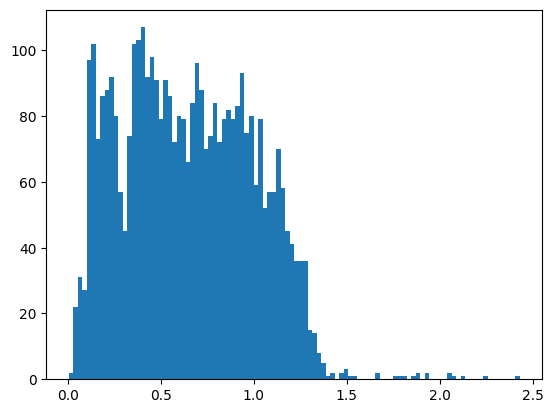

In [79]:
plt.hist(catalog_matches_noMags_full['DESY6_dnf_z'], bins = 100)
plt.show()

# Define column names

In [80]:
id = ['EMU_island_name']

redshift = ['DESY6_dnf_z']

des_filters_cigale = ['ctio_decam.g', 'ctio_decam.r', 'ctio_decam.i', 'ctio_decam.z', 'ctio_decam.Y']
des_errors_cigale = ['ctio_decam.g_err', 'ctio_decam.r_err', 'ctio_decam.i_err', 'ctio_decam.z_err', 'ctio_decam.Y_err']

viking_filters_cigale = ['paranal.vircam.Z', 'paranal.vircam.Y', 'paranal.vircam.J', 'paranal.vircam.H', 'paranal.vircam.Ks']
viking_errors_cigale = ['paranal.vircam.Z_err', 'paranal.vircam.Y_err', 'paranal.vircam.J_err', 'paranal.vircam.H_err', 'paranal.vircam.Ks_err']

catwise_filters_cigale = ['wise.W1', 'wise.W2']
catwise_errors_cigale = ['wise.W1_err', 'wise.W2_err']


In [81]:
extra_cols_dict = {
    'EMU_island_name' : 'id',
    'DESY6_dnf_z' : 'redshift',
}

des_cols_dict = {
    'DESY6_mag_auto_g_extcorr_flux': 'ctio.decam.g',
    'DESY6_mag_auto_r_extcorr_flux': 'ctio.decam.r',
    'DESY6_mag_auto_i_extcorr_flux': 'ctio.decam.i',
    'DESY6_mag_auto_z_extcorr_flux': 'ctio.decam.z',
    'DESY6_magerr_auto_g_fluxerr' : 'ctio.decam.g_err',
    'DESY6_magerr_auto_r_fluxerr' : 'ctio.decam.r_err',
    'DESY6_magerr_auto_i_fluxerr' : 'ctio.decam.i_err',
    'DESY6_magerr_auto_z_fluxerr' : 'ctio.decam.z_err',
}

viking_cols_dict = {
    'VKG_yAperMagNoAperCorr3_ab_extcorr_flux': 'paranal.vircam.Y',
    'VKG_jAperMagNoAperCorr3_ab_extcorr_flux': 'paranal.vircam.J',
    'VKG_hAperMagNoAperCorr3_ab_extcorr_flux': 'paranal.vircam.H',
    'VKG_ksAperMagNoAperCorr3_ab_extcorr_flux': 'paranal.vircam.Ks',
    'VKG_yAperMag3Err_fluxerr': 'paranal.vircam.Y_err',
    'VKG_jAperMag3Err_fluxerr': 'paranal.vircam.J_err',
    'VKG_hAperMag3Err_fluxerr': 'paranal.vircam.H_err',
    'VKG_ksAperMag3Err_fluxerr': 'paranal.vircam.Ks_err',

}

catwise_cols_dict = {
    'CAT_w1mpro_ab_flux': 'wise.W1',
    'CAT_w2mpro_ab_flux': 'wise.W2',
    'CAT_w1sigmpro_fluxerr': 'wise.W1_err',
    'CAT_w2sigmpro_fluxerr': 'wise.W2_err',
}

all_dicts = [extra_cols_dict, des_cols_dict, viking_cols_dict, catwise_cols_dict]
mag_cols = [
    'DESY6_mag_auto_g_extcorr',
    'DESY6_mag_auto_r_extcorr',
    'DESY6_mag_auto_i_extcorr',
    'DESY6_mag_auto_z_extcorr',
    'VKG_yAperMagNoAperCorr3_ab_extcorr',
    'VKG_jAperMagNoAperCorr3_ab_extcorr',
    'VKG_hAperMagNoAperCorr3_ab_extcorr',
    'VKG_ksAperMagNoAperCorr3_ab_extcorr',
    'CAT_w1mpro_ab',
    'CAT_w2mpro_ab'
]

mag_err_cols = [
    'DESY6_magerr_auto_g',
    'DESY6_magerr_auto_r',
    'DESY6_magerr_auto_i',
    'DESY6_magerr_auto_z',
    'VKG_yAperMag3Err',
    'VKG_jAperMag3Err',
    'VKG_hAperMag3Err',
    'VKG_ksAperMag3Err',
    'CAT_w1sigmpro',
    'CAT_w2sigmpro'
]

# Convert magnitudes to fluxes

In [82]:
def mag_to_flux_mJy(mag):
    '''
    Convert magnitude to flux using the formula:

    Args:
        mag (float or array-like): Magnitude value(s) to convert.

    Returns:
        float or array-like: Corresponding flux value(s) in mJy.

    '''
    return 10 ** (6.56-0.4 * mag)

def magerr_to_fluxerr_mJy(mag, magerr):
    '''
    Convert magnitude error to flux error using the formula:

    Args:
        mag (float or array-like): Magnitude value(s) to convert.
        magerr (float or array-like): Magnitude error value(s) to convert.

    Returns:
        float or array-like: Corresponding flux error value(s) in mJy.
    
    '''

    # Check if the magnitude error is 10% of the magnitude
    return np.maximum(10 ** (6.56-0.4 * mag)*0.1, (np.log(10) *  (0.4) * (10 ** (6.56-0.4 * mag)) * magerr))

In [83]:
def add_flux_to_df(df, mag_cols, mag_err_cols):
    '''
    Add flux and flux error columns to the DataFrame.
    If the flux error is smaller than 0.1, use 

    Args:
        df (DataFrame): Input DataFrame.
        mag_cols (list): List of magnitude column names.
        mag_err_cols (list): List of magnitude error column names.

    Returns:
        DataFrame: Updated DataFrame with flux and flux error columns added.
    
    '''

    df = df.copy()

    for mag_col, mag_err_col in zip(mag_cols, mag_err_cols):
        # Create new column names for flux and flux error
        flux_col = f"{mag_col}_flux"
        flux_err_col = f"{mag_err_col}_fluxerr"

        # Convert magnitudes to fluxes
        df[flux_col] = mag_to_flux_mJy(df[mag_col])

        # Convert magnitude errors to flux errors
        df[flux_err_col] = magerr_to_fluxerr_mJy(df[mag_col], df[mag_err_col])

    return df

# Create a catalog for CIGALE

Creates an ASCII file for cigale 

In [84]:
def generate_ascii_with_flux(catalog_df, mag_columns, mag_error_columns, dict_all_cols, n_rows ,output_path):
    """
    Converts magnitude columns and magnitude error columns to flux and flux error in mJy.

    Args:
        df (pd.DataFrame): DataFrame with magnitude columns and their corresponding error columns.
        mag_columns (list): List of magnitude column names to convert.
        mag_error_columns (list): List of magnitude error column names to convert.
        dict_flux_to_filters (dict): Dictionary mapping flux columns to their corresponding filters.

    Returns:
        pd.DataFrame: DataFrame with new flux and flux error columns added.
    """

    catalog_flux = add_flux_to_df(catalog_df, mag_columns, mag_error_columns)


    # Create a new DataFrame to store the data for CIGALE
    cigale_df = pd.DataFrame()

    # Add the ID, redshift columns, flux and flux_err columns
    for catalog in dict_all_cols:
        for col, new_col in catalog.items():
            cigale_df[new_col] = catalog_flux[col]

    # If the redshift column is negative, CIGALE will consider the redshifts from a grid
    cigale_df['redshift'] = -cigale_df['redshift']

    cigale_to_save = cigale_df.head(n_rows)

    cigale_to_save.to_csv(output_path, sep=' ', index=False)

    print(f'Saved Cigale file to path {output_path}')
    

In [85]:
generate_ascii_with_flux(catalog_matches_noMags_full, mag_cols, mag_err_cols, all_dicts, len(catalog_matches_noMags_full), directory + 'cigale/all_data_4/all_data_4' )

Saved Cigale file to path /home/polaris/Lab_Astro/data/cigale/all_data_4/all_data_4
